# BME-230B Spring 2019 HW 3 Question 
James Casaletto, Andrew Davidson, Yuanqing Xue, Jim Zheng

## <span style="color:red">TODO</span>
1. 3.b we are using scanpy.louvain()


## 3.a. [10 pts] 
Write code to form a bb-k-NNG based on the two chemistries (5prime and 3prime). You should fill in the methods of the class named bbknn_graph contained in the euclid_bbknn script. Turn in your code. Compute a bb-k-NNG over the PBMC dataset using k=6 to use for the next clustering step.


In [8]:
from euclid_bbknn import bbknn_graph
# import gseapy as gp
import matplotlib.pyplot as plt
# import numpy as np
# import os


#import pandas as pd
#import scanpy.api as sc
import scanpy as sc
print("scanpy.__version__:{}".format(sc.__version__))

scanpy.__version__:1.4.1


In [2]:
%%time
anndata = sc.read("PBMC.merged.h5ad")

# run our implementation of nearest neighboors and update anndata
bbknn = bbknn_graph(anndata, neighbors_within_batch=6, runPCA=True, pcs=50)

CPU times: user 3min 25s, sys: 2 s, total: 3min 27s
Wall time: 3min 21s


## 3.b. [5 pts] 
Cluster the integrated dataset using the Louvain method. Re-cluster the data now that you’ve attempted to remove the batch effect. Turn in a UMAP plot showing the integrated dataset and color the cells in the plot by their Louvain cluster assignments.


In [4]:
%%time
sc.tl.louvain(anndata,
                  flavor='igraph', 
                  directed=False, 
                  use_weights=True)

CPU times: user 2.34 s, sys: 78.6 ms, total: 2.42 s
Wall time: 1.3 s


In [6]:
%%time
sc.tl.umap(anndata)

CPU times: user 16.2 s, sys: 126 ms, total: 16.4 s
Wall time: 14.3 s


<Figure size 720x720 with 0 Axes>

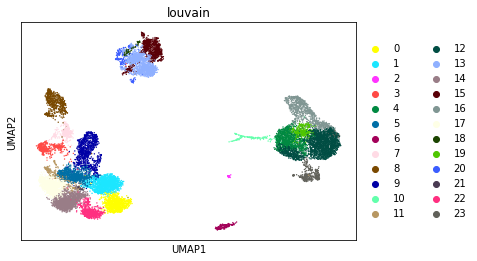

In [9]:
plt.figure(figsize=(10,10))
sc.pl.umap(anndata, color=["louvain"])